## Cat or Not

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
from random import shuffle, choice
import numpy as np
import os
import keras
from matplotlib import pyplot as plt

C:\Users\USER\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\USER\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\USER\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
def label_img(name):   
    if name == 'cats': return np.array([1, 0])
    elif name == 'notcats' : return np.array([0, 1])
    
def load_data(IMAGE_DIRECTORY):
  print("Loading images...")
  data = []
  directories = next(os.walk(IMAGE_DIRECTORY))[1]
    
  for dirname in directories:
    print("Loading {0}".format(dirname))
    file_names = next(os.walk(os.path.join(IMAGE_DIRECTORY, dirname)))[2] 
    
    for i in range(200):
      image_name = choice(file_names)
      #載入圖片路徑
      image_path = os.path.join(IMAGE_DIRECTORY, dirname, image_name)
      label = label_img(dirname)
      if "DS_Store" not in image_path:
        img = Image.open(image_path)
        img = img.convert('L') #轉換灰色圖像
        img = img.resize((IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS) 
        data.append([np.array(img),label])
  
  return data

def create_model():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=64, kernel_size=(5, 5),  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))#減少過度擬合
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2, activation = 'softmax'))

  return model

In [4]:
IMAGE_SIZE = 256
model = create_model()
model.summary()  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 123, 123, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 128)       2

In [5]:
IMAGE_DIRECTORY = './data/training_set' 
training_data=load_data(IMAGE_DIRECTORY)
training_images = np.array([i[0] for i in training_data]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE,1)
training_labels = np.array([i[1] for i in training_data])


print('creating model')
model = create_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('training model')
train_history = model.fit(training_images, training_labels, batch_size=50, epochs=10, verbose=1)
model.save("model3.h5")

Loading images...
Loading cats
Loading notcats
creating model
training model
Epoch 1/10
8/8 [==============================] - 120s 15s/step - loss: 0.9532 - accuracy: 0.5700
Epoch 2/10
8/8 [==============================] - 120s 15s/step - loss: 0.7836 - accuracy: 0.6650
Epoch 3/10
8/8 [==============================] - 120s 15s/step - loss: 0.6751 - accuracy: 0.7050
Epoch 4/10
8/8 [==============================] - 120s 15s/step - loss: 0.4751 - accuracy: 0.7975
Epoch 5/10
8/8 [==============================] - 120s 15s/step - loss: 0.3631 - accuracy: 0.8625
Epoch 6/10
8/8 [==============================] - 123s 15s/step - loss: 0.3599 - accuracy: 0.8700
Epoch 7/10
8/8 [==============================] - 120s 15s/step - loss: 0.2442 - accuracy: 0.8900
Epoch 8/10
8/8 [==============================] - 120s 15s/step - loss: 0.2434 - accuracy: 0.8875
Epoch 9/10
8/8 [==============================] - 120s 15s/step - loss: 0.1376 - accuracy: 0.9525
Epoch 10/10
8/8 [========================

In [6]:
# 模型載入
import tensorflow as tf
from tensorflow import keras
print('Loading model...')
model1 = tf.keras.models.load_model('model3.h5') 

Loading model...


In [7]:
IMAGE_DIRECTORY = './data/test_set'
testing_data=load_data(IMAGE_DIRECTORY)
testing_images = np.array([i[0] for i in testing_data]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE,1)
testing_labels = np.array([i[1] for i in testing_data])
test_history = model1.fit(training_images, training_labels, batch_size=50, epochs=10, verbose=1)

Loading images...
Loading cats
Loading notcats
Epoch 1/10
8/8 [==============================] - 120s 15s/step - loss: 0.0931 - accuracy: 0.9650
Epoch 2/10
8/8 [==============================] - 120s 15s/step - loss: 0.0573 - accuracy: 0.9800
Epoch 3/10
8/8 [==============================] - 121s 15s/step - loss: 0.0428 - accuracy: 0.9875
Epoch 4/10
8/8 [==============================] - 120s 15s/step - loss: 0.0326 - accuracy: 0.9925
Epoch 5/10
8/8 [==============================] - 120s 15s/step - loss: 0.0294 - accuracy: 0.9950
Epoch 6/10
8/8 [==============================] - 120s 15s/step - loss: 0.0279 - accuracy: 0.9900
Epoch 7/10
8/8 [==============================] - 120s 15s/step - loss: 0.0327 - accuracy: 0.9925
Epoch 8/10
8/8 [==============================] - 120s 15s/step - loss: 0.0200 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 120s 15s/step - loss: 0.0130 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 120s 15s/step - loss

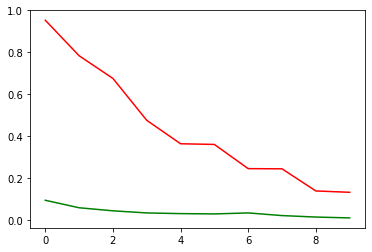

In [8]:
plt.plot(train_history.history['loss'],'r')
plt.plot(test_history.history['loss'],'g')
plt.show()

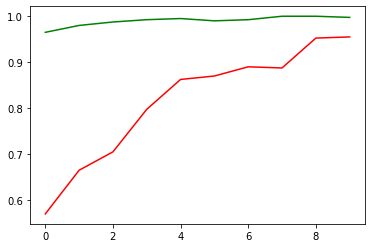

In [9]:
plt.plot(train_history.history['accuracy'],'r')
plt.plot(test_history.history['accuracy'],'g')
plt.show()

In [10]:
# 顯示訓練成果(分數)
loss, acc = model1.evaluate(testing_images, testing_labels, verbose=1)
print("accuracy: {0}".format(acc * 100))

13/13 [==============================] - 36s 3s/step - loss: 1.6827 - accuracy: 0.5775
accuracy: 57.749998569488525


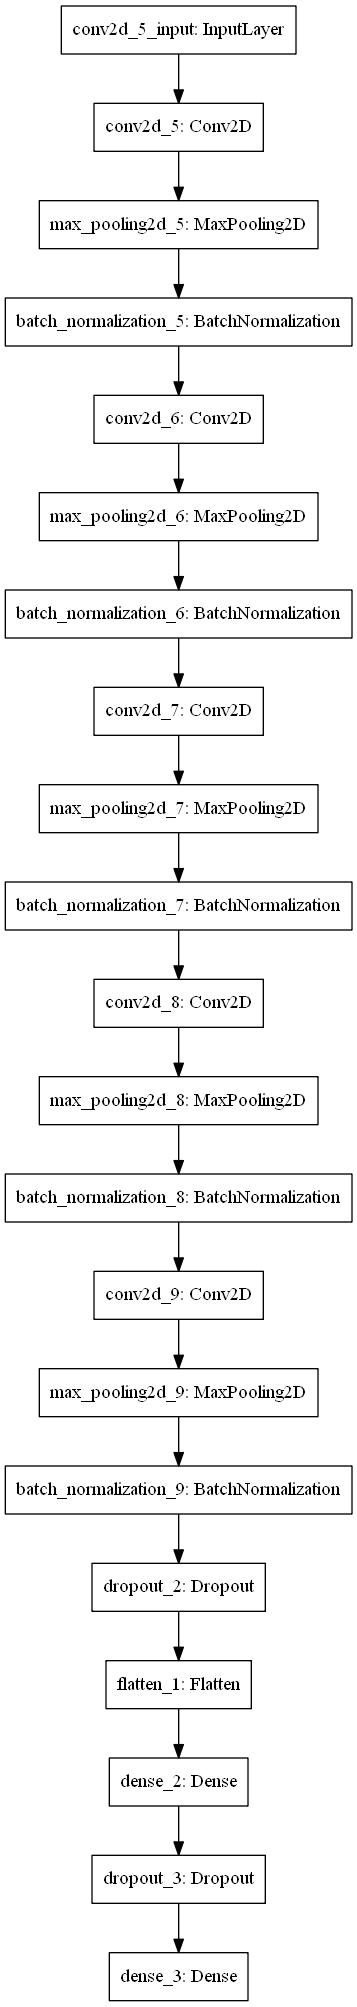

In [11]:
#繪製模型
tf.keras.utils.plot_model(model, to_file='model2.png')